In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyIEEM.data.utils import to_pd_interval

In [24]:
data_df = pd.read_csv('FormatData_ComesF.csv', index_col = [0,1,2,3,4,5,6,7])
age_group_x = data_df.index.get_level_values('age_x').unique().sort_values()
age_group_y = data_df.index.get_level_values('age_y').unique().sort_values()

In [25]:
location = 'home'
duration = '60-240 min'
type_day = 'weekday'
vacation = False

In [26]:
data = data_df.loc[slice(None), slice(None), location, duration, type_day, vacation, slice(None), slice(None)].reset_index()
data.drop(columns='sector', inplace=True)

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm

fam = sm.families.NegativeBinomial()
ind = sm.cov_struct.Independence()
mod = smf.gee("reported_contacts ~ age_y + age_x", "ID", data, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:           reported_contacts   No. Observations:                 5915
Model:                                 GEE   No. clusters:                     1183
Method:                        Generalized   Min. cluster size:                   5
                      Estimating Equations   Max. cluster size:                   5
Family:                   NegativeBinomial   Mean cluster size:                 5.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 10 Jul 2023   Scale:                           1.000
Covariance type:                    robust   Time:                         17:42:45
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8857      0.105     -8.464      0.000      -1

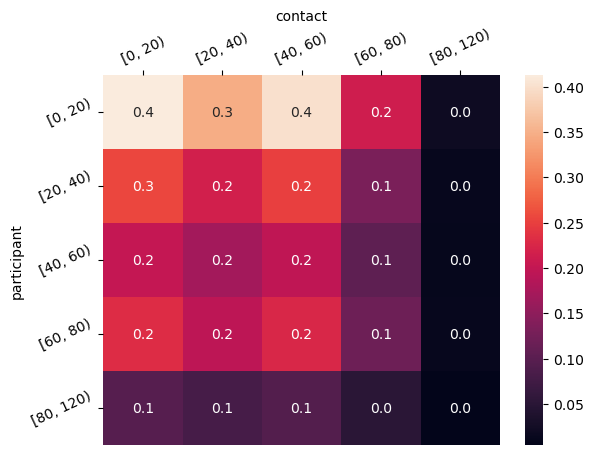

In [27]:
data['predicted_contacts'] = res.predict()
data_interim = data
data_interim = data_interim.drop(columns=['ID', 'reported_contacts'])
data_interim = data_interim.groupby(by=['age_x', 'age_y']).last()
data_interim = data_interim.loc[slice(None), slice(None)]
matrix = data_interim.values.reshape([len(age_group_x), len(age_group_y)])

fig,ax=plt.subplots()
ax = sns.heatmap(matrix, annot=True, fmt='.1f')
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
#ax.set(xticklabels=list(age_group_x.values.astype(str)), yticklabels=list(age_group_y.values.astype(str)))
ax.set_xticklabels(list(age_group_x.values.astype(str)), rotation = 25)
ax.set_yticklabels(list(age_group_y.values.astype(str)), rotation = 25)

ax.set(xlabel='contact', ylabel='participant')
plt.show()
plt.close()